# Support vector Machine
    SVMs work by finding the optimal hyperplane that separates data points into different classes.
    
    

Theory link : 
https://medium.com/low-code-for-advanced-data-science/support-vector-machines-svm-an-intuitive-explanation-b084d6238106


# Example with Dataset
     Dataset is about Default or not Default of credit card
     

Dataset link : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data

# Steps
    1. Importing Data from a file
    2. Missing data
    3. Downsampling Data
    4. Formatting the data for svm
    5. Building premilinary SVM
    6. Optimizing parameters with cross validation
    7. Building , evaluating, drawing and interpreting the final svm
    

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample # for resample or downsampling the data
from sklearn .model_selection import train_test_split # split the data
from sklearn.preprocessing import scale # scale and Center data 
from sklearn.svm import SVC # creates support vector machine for classification 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix # creatiing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # Displaying confusion matrix
from sklearn.decomposition import PCA # perfroms PCA plots

In [3]:
os.getcwd()

'C:\\Users\\Asus\\Desktop\\Jupyter\\Algorithms\\SVM'

In [4]:
df=pd.read_csv("C:\\Users\\Asus\\Desktop\\Jupyter\\datasets\\UCL_ Default Credi card\\UCI_Credit_Card.csv")

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.rename({"default.payment.next.month": "Default"}, axis="columns",inplace=True) # Renaming the last columns

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
df.drop("ID",axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
len(df)

30000

In [10]:
df.shape

(30000, 24)

In [11]:
df.dtypes # checking if any NA or different types

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
Default        int64
dtype: object

In [12]:
df["SEX"].unique()

array([2, 1], dtype=int64)

In [13]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [14]:
df['PAY_0'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [15]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [16]:
df["Default"].unique()

array([1, 0], dtype=int64)

In [17]:
len(df.loc[(df["EDUCATION"]==0)| (df["MARRIAGE"]==0)])

68

In [18]:
len(df)

30000

In [19]:
df_no_missing=df.loc[(df["EDUCATION"]!=0) & (df["MARRIAGE"]!=0)]

In [20]:
len(df_no_missing)

29932

In [21]:
df_no_missing["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

# Downsampling

In [22]:
df_no_default=df_no_missing[df_no_missing["Default"]==0]
df_default=df_no_missing[df_no_missing["Default"]==1]

In [23]:
print(f"No default {len(df_no_default)} and Default {len(df_default)}")

No default 23301 and Default 6631


In [24]:
# Downsampling using resample function
df_no_default_ds=resample(df_no_default,replace=False,n_samples=1000,random_state=42)

df_no_default_ds.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
641,130000.0,2,3,1,28,0,0,0,0,-2,...,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0,0
4678,170000.0,1,3,1,29,0,0,0,0,0,...,35234.0,32869.0,33862.0,7200.0,7500.0,1200.0,1200.0,1500.0,1300.0,0
16004,180000.0,2,2,1,29,0,0,0,0,0,...,26662.0,26166.0,26176.0,1800.0,1800.0,1500.0,1056.0,950.0,1000.0,0
22974,210000.0,2,2,2,32,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,979.0,412.0,0.0,0.0,0.0,0.0,0
17535,190000.0,2,3,1,45,0,0,0,0,0,...,81778.0,83082.0,84811.0,3300.0,3331.0,3359.0,2663.0,2751.0,3000.0,0


In [25]:
df_default_ds=resample(df_default,replace=False, n_samples=1000, random_state=42)

df_default_ds.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
19982,300000.0,2,1,1,47,3,2,2,2,2,...,5000.0,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19350,80000.0,2,2,2,36,2,0,0,-2,-2,...,0.0,0.0,0.0,1700.0,0.0,0.0,0.0,0.0,0.0,1
17057,30000.0,2,3,2,22,2,2,0,0,0,...,29507.0,11609.0,11711.0,0.0,1687.0,1147.0,524.0,400.0,666.0,1
26996,80000.0,1,1,2,34,2,2,2,2,2,...,64682.0,65614.0,67007.0,2800.0,3000.0,2500.0,2600.0,2600.0,2600.0,1
23621,210000.0,2,3,1,44,-2,-2,-2,-2,-2,...,0.0,5646.0,14793.0,13462.0,17706.0,0.0,5646.0,14793.0,7376.0,1


In [26]:
df_ds=pd.concat([df_no_default_ds, df_default_ds])
len(df_ds)

2000

In [27]:
df_ds.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
641,130000.0,2,3,1,28,0,0,0,0,-2,...,0.0,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0,0
4678,170000.0,1,3,1,29,0,0,0,0,0,...,35234.0,32869.0,33862.0,7200.0,7500.0,1200.0,1200.0,1500.0,1300.0,0
16004,180000.0,2,2,1,29,0,0,0,0,0,...,26662.0,26166.0,26176.0,1800.0,1800.0,1500.0,1056.0,950.0,1000.0,0
22974,210000.0,2,2,2,32,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,979.0,412.0,0.0,0.0,0.0,0.0,0
17535,190000.0,2,3,1,45,0,0,0,0,0,...,81778.0,83082.0,84811.0,3300.0,3331.0,3359.0,2663.0,2751.0,3000.0,0


# Formatting data

In [28]:
X=df_ds.drop("Default",axis=1).copy() 
X.shape

(2000, 23)

In [29]:
y=df_ds["Default"].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: Default, dtype: int64

# One-Hot encoding (important) 
    Scikit learn needs categorical data
    which have lots of category needs to change , like marriage
    1. using ColumnTransformer()
    2. get_dummies()

In [30]:
pd.get_dummies(X,columns=["SEX"]).head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2
641,130000.0,3,1,28,0,0,0,0,-2,-2,...,0.0,0.0,2500.0,1000.0,0.0,0.0,0.0,0.0,0,1
4678,170000.0,3,1,29,0,0,0,0,0,0,...,32869.0,33862.0,7200.0,7500.0,1200.0,1200.0,1500.0,1300.0,1,0
16004,180000.0,2,1,29,0,0,0,0,0,0,...,26166.0,26176.0,1800.0,1800.0,1500.0,1056.0,950.0,1000.0,0,1
22974,210000.0,2,2,32,-2,-2,-2,-2,-2,-2,...,0.0,0.0,979.0,412.0,0.0,0.0,0.0,0.0,0,1
17535,190000.0,3,1,45,0,0,0,0,0,0,...,83082.0,84811.0,3300.0,3331.0,3359.0,2663.0,2751.0,3000.0,0,1


In [31]:
X_encoded=pd.get_dummies(X,columns=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"])

In [32]:
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000.0,28,100143.0,50456.0,50000.0,0.0,0.0,0.0,2500.0,1000.0,...,0,1,0,0,0,0,0,0,0,0
4678,170000.0,29,165027.0,168990.0,172307.0,35234.0,32869.0,33862.0,7200.0,7500.0,...,0,0,0,1,0,0,0,0,0,0
16004,180000.0,29,25781.0,26000.0,26310.0,26662.0,26166.0,26176.0,1800.0,1800.0,...,0,0,0,1,0,0,0,0,0,0
22974,210000.0,32,355.0,975.0,410.0,0.0,0.0,0.0,979.0,412.0,...,0,1,0,0,0,0,0,0,0,0
17535,190000.0,45,76433.0,78472.0,80548.0,81778.0,83082.0,84811.0,3300.0,3331.0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
X_encoded.shape

(2000, 81)

# Centering,Splitting and Scaling

In [34]:
#Split
X_train,X_test, y_train, y_test=train_test_split(X_encoded,y,random_state=42)


In [35]:
y_train.shape

(1500,)

In [36]:
X_train.shape

(1500, 81)

In [37]:
print(f"X_train {X_train.shape}  X_test  {X_test.shape}  y_train  {y_train.shape}  y_test  {y_test.shape}")

X_train (1500, 81)  X_test  (500, 81)  y_train  (1500,)  y_test  (500,)


In [38]:
X_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
20804,290000.0,42,0.0,0.0,0.0,0.0,1855.0,3940.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
17890,170000.0,28,56061.0,57179.0,58450.0,58556.0,51671.0,51090.0,2051.0,2197.0,...,0,0,0,1,0,0,0,0,0,0
11135,90000.0,27,25118.0,26128.0,25248.0,26386.0,24171.0,25607.0,1440.0,1500.0,...,0,0,0,1,0,0,0,0,0,0
28988,160000.0,47,1857.0,1672.0,836.0,836.0,836.0,836.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
7056,100000.0,29,48186.0,48924.0,47837.0,51361.0,50417.0,51400.0,1800.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
#scalling

In [40]:
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

In [41]:
X_train_scaled

array([[ 1.06764453,  0.66459398, -0.69871481, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [ 0.11806446, -0.8151    ,  0.04305464, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [-0.51498893, -0.92079242, -0.36636674, ...,  0.        ,
        -0.0365392 , -0.05170877],
       ...,
       [ 1.22590788, -0.39233029,  3.60225397, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [-0.27759391,  1.61582582, -0.69871481, ...,  0.        ,
        -0.0365392 , -0.05170877],
       [-1.06891064, -1.34356213, -0.47601594, ...,  0.        ,
        -0.0365392 , -0.05170877]])

# Preliminary SVM

In [42]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

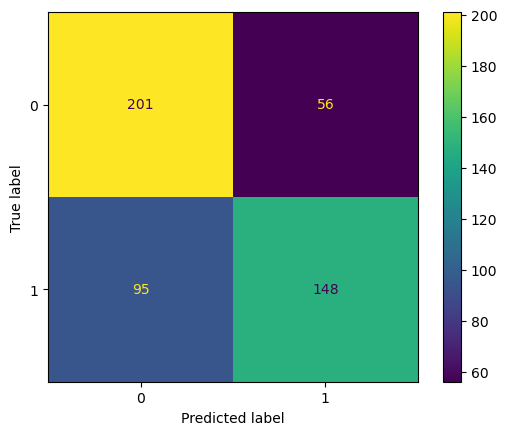

In [43]:
#plotting Confusion matrix
predictions=clf_svm.predict(X_test_scaled) # predicting
cm=confusion_matrix(y_test,predictions,labels=clf_svm.classes_) #creating Confusion Matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_svm.classes_) # for displaying Confusion Matrix

disp.plot()



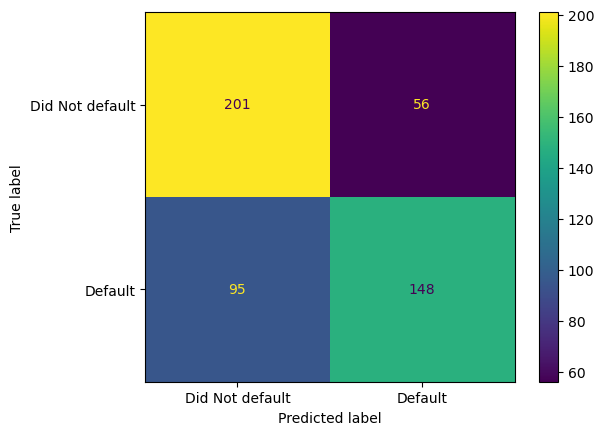

In [44]:
#plotting Confusion matrix
predictions=clf_svm.predict(X_test_scaled) # predicting
cm=confusion_matrix(y_test,predictions,labels=clf_svm.classes_) #creating Confusion Matrix [0,1]
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Did Not default", "Default"]) # for displaying Confusion Matrix

disp.plot()


TP= 148, TN=201, FP=56,  FN=95

In [45]:
TP=148
TN=201
FP=56
FN=95

In [46]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
F1_score=(2*precision*recall)/(precision+recall)
print(f"Accuracy {accuracy*100}% \n Precision {precision*100}%\n Recall {recall*100}%\n F1 score {F1_score*100}%")

Accuracy 69.8% 
 Precision 72.54901960784314%
 Recall 60.90534979423868%
 F1 score 66.2192393736018%


In [47]:
from sklearn import metrics

In [48]:
metrics.accuracy_score(y_test,predictions)

0.698

In [49]:
metrics.precision_score(y_test,predictions)

0.7254901960784313

In [50]:
metrics.recall_score(y_test,predictions)

0.6090534979423868

In [51]:
metrics.roc_auc_score(y_test,predictions)

0.695577332628781

# Seems like each of them is low, So we need to optimize

When we are optimizing SVM , that means finding best value for *gamma* and potetially the regularization parameter *C* . We could try using cross validation.

We will use GridSearchCV(). we specify a bunch of potential values for gamma and C and GridSearchCV() to tests all possible combinations for the parameters

In [52]:
param_grid=[
    {
        "C":[0.5,1,10,100], # C must be greater than 0
        "gamma":["scale",1,0.1, 0.01, 0.001, 0.0001],
        "kernel":["rbf"]
    },
]

In [53]:
optimal_params=GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring="accuracy", # we can also use f1, roc_auc, balanced_accuracy
    verbose=0 # if u want to see what grid search doing set verbose =2
)

In [54]:
optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Now lets see the result using this values

In [55]:
clf_svm=SVC(random_state=42, C=100, gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=100, gamma=0.001, random_state=42)

In [56]:
y_pred=clf_svm.predict(X_test_scaled)

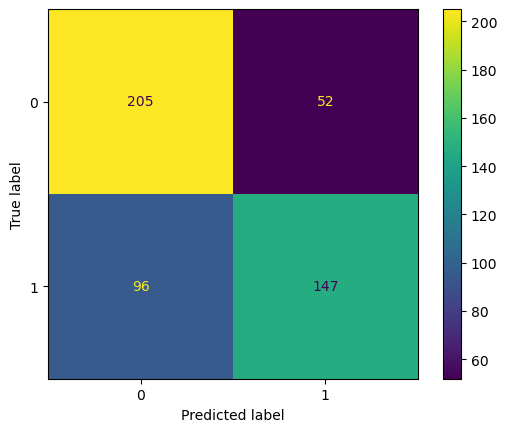

In [57]:
cm=confusion_matrix(y_test,y_pred, labels=clf_svm.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_svm.classes_)
disp.plot()

In [58]:
metrics.accuracy_score(y_test,y_pred)

0.704

Still not good

# PCA (Principal Component Analysis)
    It basically shrink the total colums of X to 2, SO 24-Dimensional graph to 2-dimensional Graph

(1500, 81)


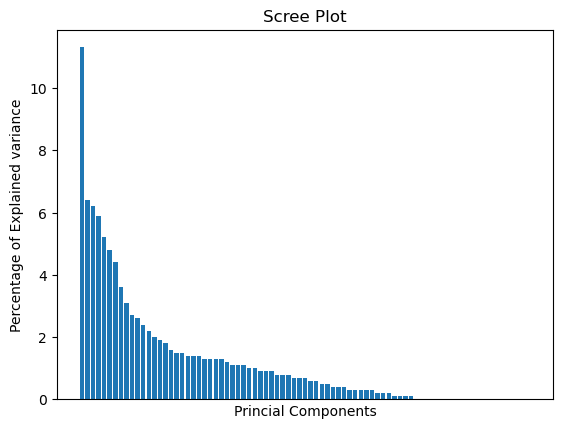

In [59]:
pca=PCA()
X_train_pca=pca.fit_transform(X_train_scaled)
print(X_train_pca.shape)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=[str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis="x",
    which="both",
    bottom=False,
    top=False,
    labelbottom=False

)
plt.ylabel("Percentage of Explained variance")
plt.xlabel("Princial Components")
plt.title("Scree Plot")
plt.show()

First two bar are expected to taller, but here only one.
so that means the approxamation will not be good

# Now we will try to optimize using the PCA shrink values

In [60]:
train_pc1=X_train_pca[:,0] # X cordinate of PCA
train_pc2=X_train_pca[:,1] # Y cordinate of PCA

pca_train_scaled=scale(np.column_stack((train_pc1,train_pc2)))

params_grid=[
    {
        "C":[1,10,100,1000],
        "gamma":["scale",1,0.1,0.01, 0.001, 0.0001],
        "kernel": ["rbf"]
    },
]

optimal_params=GridSearchCV(
    SVC(),
    params_grid,
    cv=5,
    scoring="accuracy",
    verbose=0

)


In [61]:
optimal_params.fit(pca_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


Now lets try this values

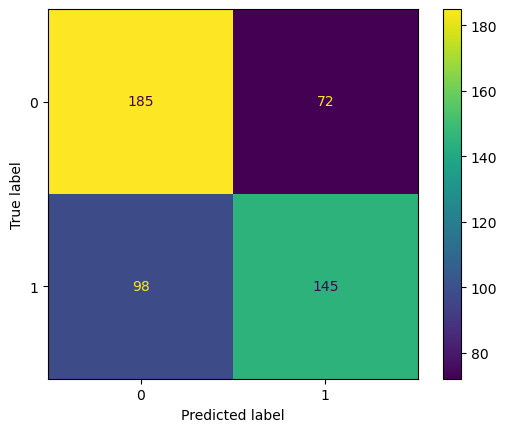

In [62]:
clf_svm=SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(X_train_scaled,y_train)
y_pred=clf_svm.predict(X_test_scaled)
cm=confusion_matrix(y_test,y_pred, labels=clf_svm.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_svm.classes_)
disp.plot()

In [63]:
metrics.accuracy_score(y_test,y_pred)

0.66

(500,)


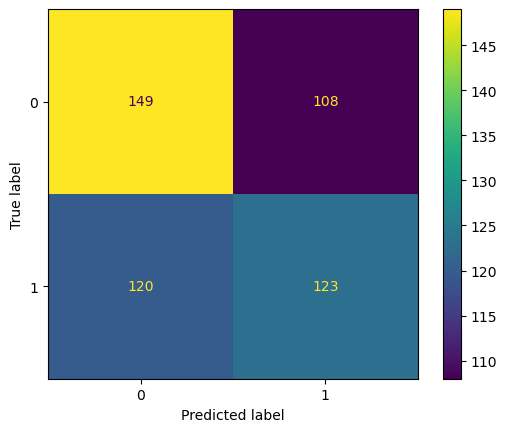

In [64]:
pca=PCA()
clf_svm=SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled,y_train)


X_test_pca=pca.fit_transform(X_test_scaled)
test_pc1=X_test_pca[:,0] # X cordinate of PCA
test_pc2=X_test_pca[:,1] # Y cordinate of PCA

pca_test_scaled=scale(np.column_stack((test_pc1,test_pc2)))
# print(X_test_pca.shape)
y_pred=clf_svm.predict(pca_test_scaled)
print(y_pred.shape)
cm=confusion_matrix(y_test,y_pred, labels=clf_svm.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_svm.classes_)
disp.plot()

In [65]:
metrics.accuracy_score(y_test,y_pred)

0.544